In [1]:
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import os
import gzip
import numpy as np
import copy
import random
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
# libraries for data cleaning and plots
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns

#nlp
import string
import re   
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer 

#settings
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lakki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lakki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
!pip install scikit-plot

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

## Importing the dataset

In [3]:
# importing the dataset
train = pd.read_csv("Project_train.csv")
test = pd.read_csv("Project_test.csv")
test_lables = pd.read_csv("Project_test_labels.csv")
train.shape
test_lables

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [4]:
test_data=pd.concat([test, test_lables.reindex(test_lables.toxic.index)], axis=1)
test_data

,id,comment_text,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [5]:
test_data = test_data[test_data.toxic != -1]

In [6]:
test_data

,id,comment_text,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",00059ace3e3e9a53,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
153150,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",fff8f64043129fa2,0,0,0,0,0,0
153151,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,fff9d70fe0722906,0,0,0,0,0,0
153154,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,fffa8a11c4378854,0,0,0,0,0,0
153155,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,fffac2a094c8e0e2,1,0,1,0,1,0


In [8]:
# see how the data looks like
train.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
# see the sizes of the train and test data
nrow_train = train.shape[0]
nrow_test = test.shape[0]
sum_all = nrow_train + nrow_test
print("              : train   | test")
print("# of rows     :",nrow_train," |",nrow_test)
print("percentage    :",round(nrow_train*100/sum_all),"     |",round(nrow_test*100/sum_all))

              : train   | test
# of rows     : 159571  | 153164
percentage    : 51      | 49


In [8]:
# missing value check
print("missing values in train data")
print(train.isnull().sum())

print("missing values in test data")
print(test.isnull().sum())

missing values in train data
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
missing values in test data
id              0
comment_text    0
dtype: int64


There are no missing values in the datasets

In [9]:
# marking comments without any tags as "nontoxic"

x = train.iloc[:,2:].sum()
rowsums = train.iloc[:,2:].sum(axis=1)
train['nontoxic'] = (rowsums==0)

train['nontoxic'].sum()
print("Total # of comments = ",len(train))
print("Total # of nontoxic comments = ",train['nontoxic'].sum())
print("Total # of tags =",x.sum())

Total # of comments =  159571
Total # of nontoxic comments =  143346
Total # of tags = 35098


C:\Users\lakki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


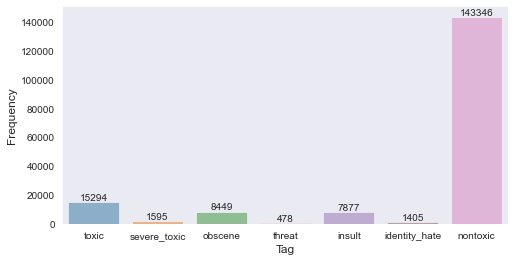

In [10]:
# check for the distribution of tags in the train data
x = train.iloc[:,2:].sum()

plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.5)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Tag', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Note that the toxicity is not evenly spread out. Therefore, we must be careful about imbalance issues. 

C:\Users\lakki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


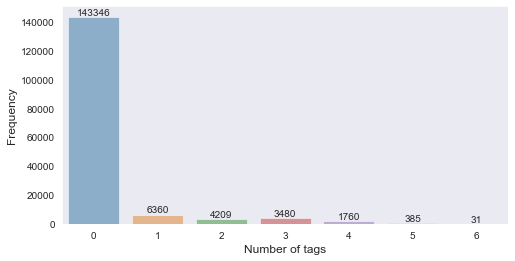

In [12]:
# check how many comments have multiple tags
x = rowsums.value_counts()

plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.5)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Number of tags', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Around 10% of the total comments are toxic, the rest are nontoxic. Plus, some comments are tagged with more than one toxic tag.

<AxesSubplot:>

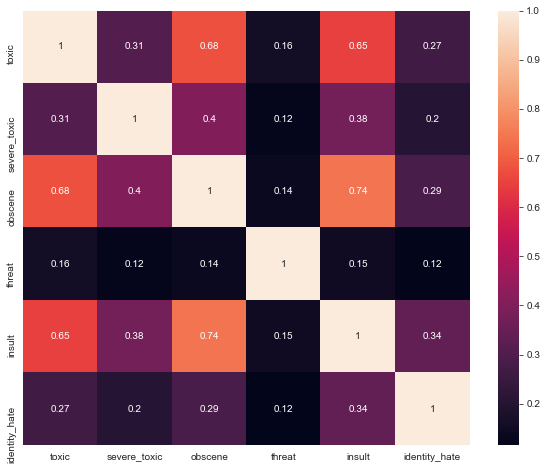

In [13]:
# see the correlation of the tags
temp_df = train.iloc[:,2:-1]

corr = temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

## Cleaning

In [14]:
merge = train.iloc[:,0:2]
df = merge.reset_index(drop=True)
merge.shape


(159571, 2)

In [15]:
corpus = merge.comment_text
corpus

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [16]:
# Aphost lookup dict
APPO = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [17]:
def clean(comment):
    """
    This function receives comments and returns clean word-list
    """
    #Convert to lower case , so that Hi and hi are the same
    comment = comment.lower()
    #remove \n
    comment = re.sub("\\n","",comment)
    # remove leaky elements like ip,user
    comment = re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",comment)
    #removing usernames
    comment = re.sub("\[\[.*\]","",comment)
    
    #Split the sentences into words

    words = tokenizer.tokenize(comment)
    
    # (')aphostophe  replacement (ie)   you're --> you are  
    words =[APPO[word] if word in APPO else word for word in words]
    words =[lem.lemmatize(word, "v") for word in words]
    words = [w for w in words if not w in eng_stopwords]
    
    clean_sent =" ".join(words)
    # remove any non alphanum, digit character
    clean_sent = re.sub("\W+"," ",clean_sent)
    clean_sent = re.sub("  "," ",clean_sent)
    return(clean_sent)

In [18]:
# see how it works with a random row
corpus.iloc[1000]


"Rex Mundi \n\nI've created a stub on Rex Mundi at Rex Mundi High School.  Only thing I know about it is that both my Aunt Donna and Bob Griese went there.  Please add anything you might know about it.\n\nBTW, my dad was a Panther; I live in Princeton myself."

In [19]:
import nltk
#nltk.download('wordnet')

In [20]:
clean(corpus.iloc[1000])


'rex mundi I have create stub rex mundi rex mundi high school thing know aunt donna bob griese go please add anything might know it btw dad panther live princeton '

In [21]:
clean_corpus = corpus.apply(lambda x :clean(x))

In [22]:
clean_corpus.shape

(159571,)

In [23]:
x=clean_corpus
y=train.toxic

In [24]:
x.shape,y.shape

((159571,), (159571,))

## Clean test data

In [25]:
merge = test_data.iloc[:,0:2]
df = merge.reset_index(drop=True)
corpus = merge.comment_text
clean_corpus = corpus.apply(lambda x :clean(x))


In [26]:
x_test=clean_corpus
x_test

5         thank understand think highly would revert wit...
7                                  d ear god site horrible 
11         somebody invariably try add religion really m...
13         say right type type institution need case thr...
14         add new product list make sure it is relevant...
                                ...                        
153150     jerome see never get around surprise look exa...
153151     lucky bastard http wikimediafoundation org wi...
153154                     shame want speak gays romanians 
153155    mel gibson nazi bitch make shitty movies much ...
153156     unicorn lair discovery supposedly unicorn lai...
Name: comment_text, Length: 63978, dtype: object

In [27]:
y_test=test_data.toxic
y_test

5         0
7         0
11        0
13        0
14        0
         ..
153150    0
153151    0
153154    0
153155    1
153156    0
Name: toxic, Length: 63978, dtype: int64

## Now we have clean data

## Bag of words with logistic regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy 0.913720341367345
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     57888
           1       0.53      0.78      0.63      6090

    accuracy                           0.91     63978
   macro avg       0.75      0.85      0.79     63978
weighted avg       0.93      0.91      0.92     63978



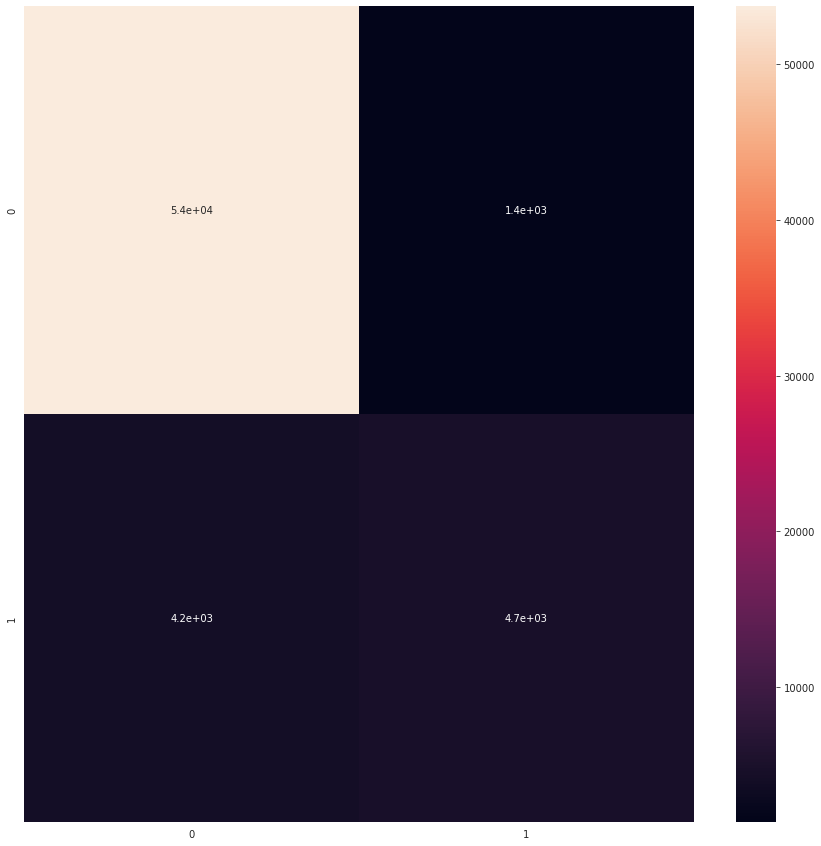

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(x, y)


y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(15,15))
sn.heatmap(df_cm, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## TfidfTransformer + Countvectorizer with logistic regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy 0.916002375816687


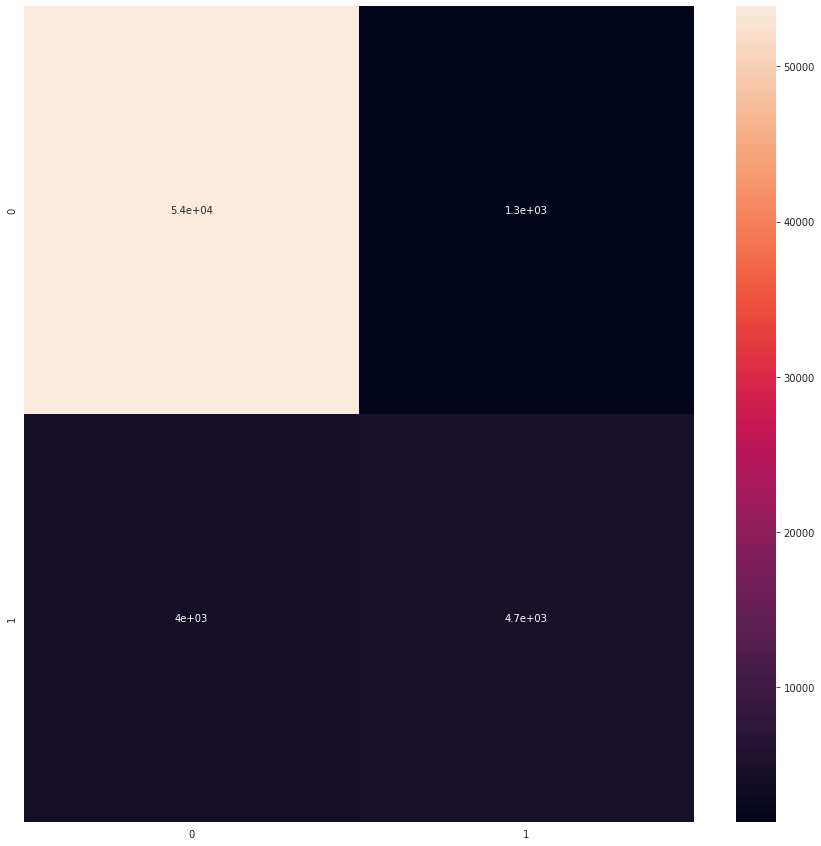

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(x, y)


y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(15,15))
sn.heatmap(df_cm, annot=True)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     57888
           1       0.54      0.78      0.64      6090

    accuracy                           0.92     63978
   macro avg       0.76      0.85      0.80     63978
weighted avg       0.93      0.92      0.92     63978



## TfidfTransformer + Countvectorizer with logistic regression with balance class weight

In [44]:
!pip install imblearn

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy 0.8808496670730563
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     57888
           1       0.44      0.91      0.59      6090

    accuracy                           0.88     63978
   macro avg       0.71      0.90      0.76     63978
weighted avg       0.94      0.88      0.90     63978



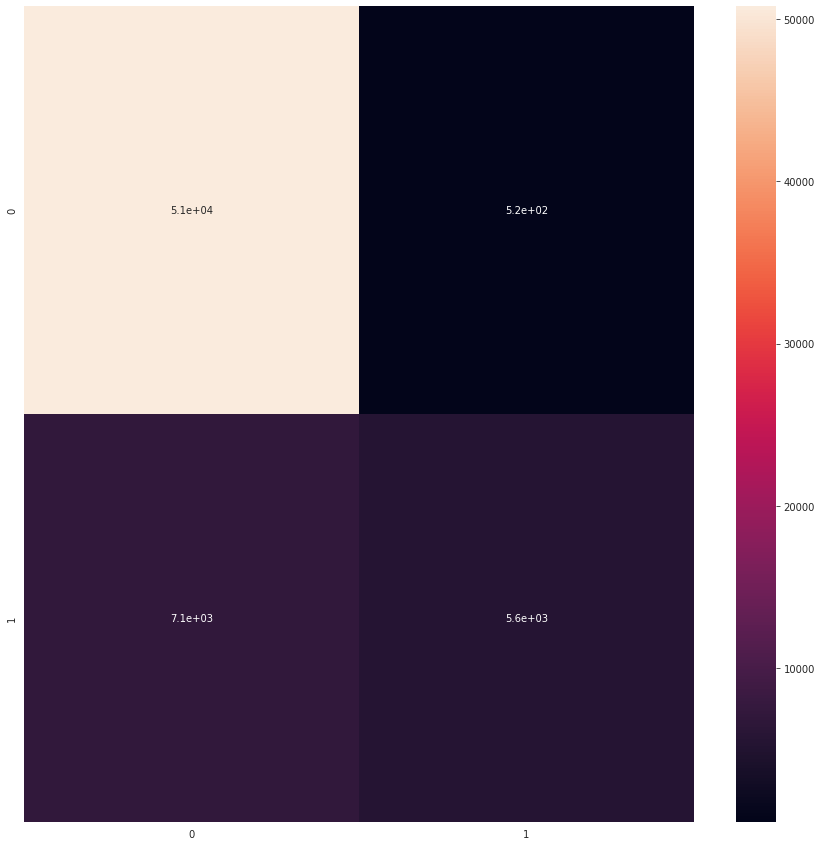

In [45]:
from collections import Counter
n= Counter(y)
ratio = int(n[0]/n[1])


class_weight={0:1, 1:ratio}
logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(class_weight=class_weight)),
               ])
logreg.fit(x, y)


y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(15,15))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

# Andres classifiers : Decision Tree and Random Forest

## Decision Tree with CountVectorizer

accuracy 0.8996998968395385
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     57888
           1       0.48      0.77      0.60      6090

    accuracy                           0.90     63978
   macro avg       0.73      0.84      0.77     63978
weighted avg       0.93      0.90      0.91     63978



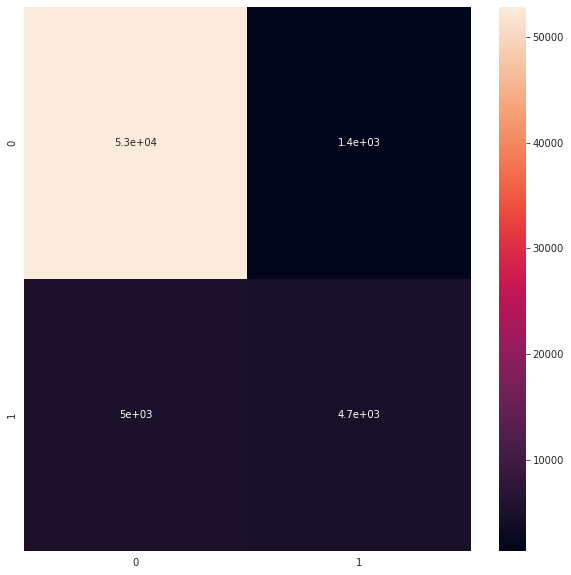

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

steps = [("vect", CountVectorizer()),
        ("clf", DecisionTreeClassifier())]

Decision_tree = Pipeline(steps)

Decision_tree.fit(x, y)

y_pred = Decision_tree.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,10))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Decision Tree with CountVectorizer and Tf-idf Transformers

accuracy 0.9001219169089375
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     57888
           1       0.48      0.80      0.60      6090

    accuracy                           0.90     63978
   macro avg       0.73      0.85      0.77     63978
weighted avg       0.93      0.90      0.91     63978



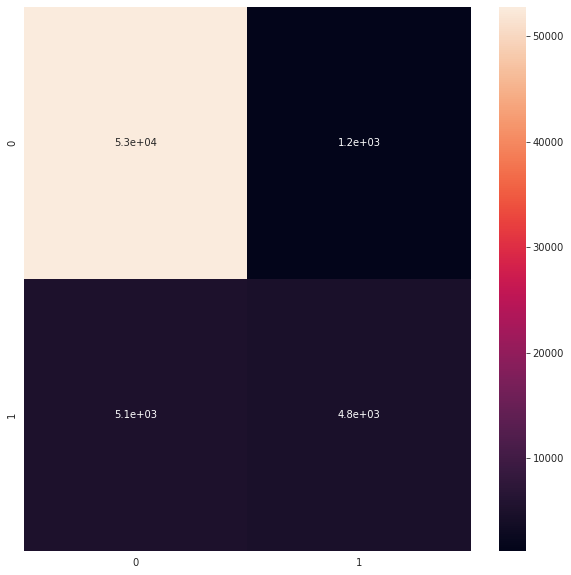

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

steps = [("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()), 
        ("clf", DecisionTreeClassifier())]

Decision_tree = Pipeline(steps)

Decision_tree.fit(x, y)

y_pred = Decision_tree.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,10))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Random Forest with CountVectorizer

accuracy 0.9364312732501797
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     57888
           1       0.68      0.63      0.65      6090

    accuracy                           0.94     63978
   macro avg       0.82      0.80      0.81     63978
weighted avg       0.93      0.94      0.94     63978



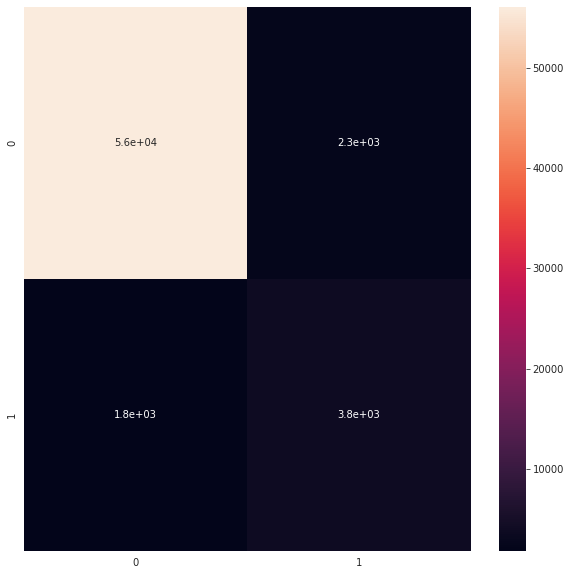

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

steps = [("vect", CountVectorizer()),
        ("clf", RandomForestClassifier())]

Decision_tree = Pipeline(steps)

Decision_tree.fit(x, y)

y_pred = Decision_tree.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,10))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Random Forest with CountVectorizer and Tf-idf Transformers

accuracy 0.9385257432242333
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     57888
           1       0.70      0.63      0.66      6090

    accuracy                           0.94     63978
   macro avg       0.83      0.80      0.81     63978
weighted avg       0.94      0.94      0.94     63978



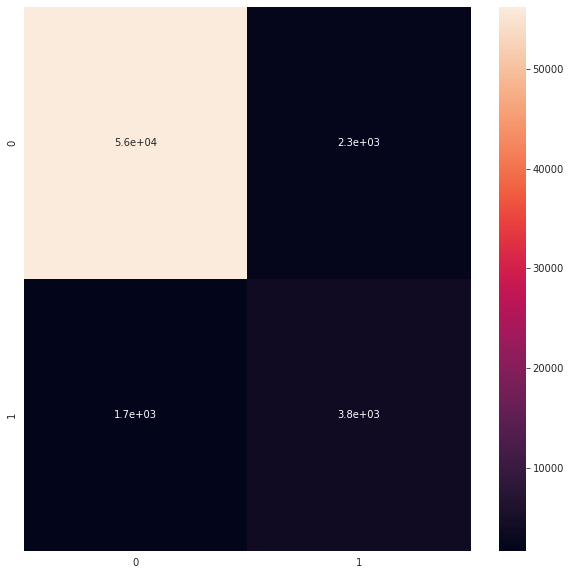

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

steps = [("vect", CountVectorizer()),
         ("tfidf", TfidfTransformer()),
        ("clf", RandomForestClassifier())]

Decision_tree = Pipeline(steps)

Decision_tree.fit(x, y)

y_pred = Decision_tree.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,10))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## MultinomialNB with CountVectorizer and Tf-idf Transformers

accuracy 0.9210040951577104
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     57888
           1       0.89      0.19      0.32      6090

    accuracy                           0.92     63978
   macro avg       0.91      0.60      0.64     63978
weighted avg       0.92      0.92      0.90     63978



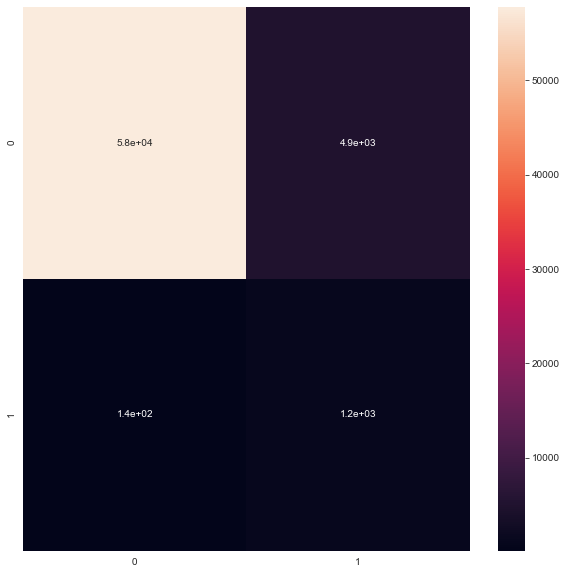

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

steps = [("vect", CountVectorizer()),
         ("tfidf", TfidfTransformer()),
        ("clf", MultinomialNB())]

Decision_tree = Pipeline(steps)

Decision_tree.fit(x, y)

y_pred = Decision_tree.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,10))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Results without data clean up

## RandomForsetClassifier with CountVectorizer and Tf-idf Transformers

In [19]:
X_test=test_data.comment_text
Y_test=test_data.toxic
X=train.comment_text
Y=train.toxic

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                    ('clf', RandomForestClassifier()),
               ])
logreg.fit(X, Y)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

accuracy 0.9129075619744287
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     57888
           1       0.55      0.46      0.50      6090

    accuracy                           0.91     63978
   macro avg       0.75      0.71      0.73     63978
weighted avg       0.91      0.91      0.91     63978



## Logistic Regression with CountVectorizer and Tf-idf Transformers

In [18]:
X_test=test_data.comment_text
Y_test=test_data.toxic
X=train.comment_text
Y=train.toxic


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X, Y)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

C:\Users\lakki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.9180968457907406
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     57888
           1       0.55      0.79      0.65      6090

    accuracy                           0.92     63978
   macro avg       0.76      0.86      0.80     63978
weighted avg       0.94      0.92      0.92     63978



## Decision Tree Classifier  with CountVectorizer and Tf-idf Transformers

In [30]:
X_test=test_data.comment_text
Y_test=test_data.toxic
X=train.comment_text
Y=train.toxic


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier()),
               ])
logreg.fit(X, Y)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

accuracy 0.8789427615742912
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     57888
           1       0.42      0.76      0.54      6090

    accuracy                           0.88     63978
   macro avg       0.70      0.82      0.74     63978
weighted avg       0.92      0.88      0.89     63978



## Multinomial NB with CountVectorizer and Tf-idf Transformers

In [31]:
X_test=test_data.comment_text
Y_test=test_data.toxic
X=train.comment_text
Y=train.toxic


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])
logreg.fit(X, Y)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, Y_test))
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

accuracy 0.9179405420613336
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     57888
           1       0.81      0.18      0.29      6090

    accuracy                           0.92     63978
   macro avg       0.87      0.59      0.62     63978
weighted avg       0.91      0.92      0.89     63978



## Best ML Model Random Forest Classifier with CountVectorizer and Tf-idf Transformers

accuracy 0.93822876613836
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     57888
           1       0.70      0.62      0.66      6090

    accuracy                           0.94     63978
   macro avg       0.83      0.80      0.81     63978
weighted avg       0.94      0.94      0.94     63978



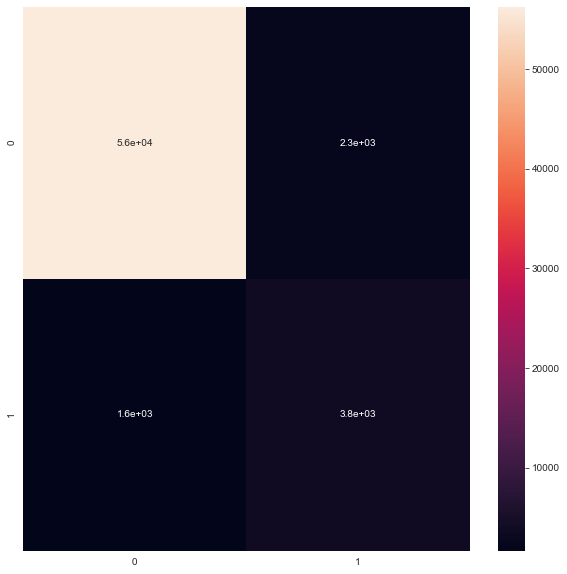

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

steps = [("vect", CountVectorizer()),
         ("tfidf", TfidfTransformer()),
        ("clf", RandomForestClassifier())]

Decision_tree = Pipeline(steps)

Decision_tree.fit(x, y)

y_pred = Decision_tree.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,10))
sn.heatmap(df_cm, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Demo with Best Model

In [47]:
test_sample=['i hope you go kill yourself']
result=Decision_tree.predict(test_sample)
if result==1:
    print('Toxic')
else:
    print('Non Toxic')
result

Toxic


array([1], dtype=int64)

In [48]:
test_sample=['I hope you die in a house fire.']
result=Decision_tree.predict(test_sample)
if result==1:
    print('Toxic')
else:
    print('Non Toxic')
result

Toxic


array([1], dtype=int64)

In [49]:
test_sample=['I wish you have a nice day, you handsome gentlemen']
result=Decision_tree.predict(test_sample)
if result==1:
    print('Toxic')
else:
    print('Non Toxic')
result

Non Toxic


array([0], dtype=int64)